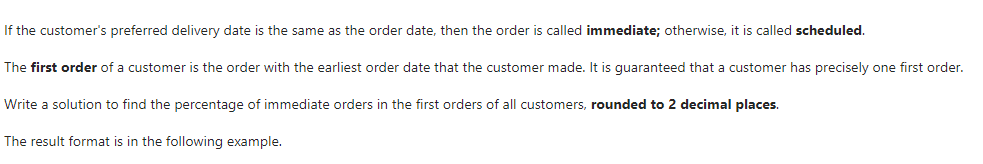

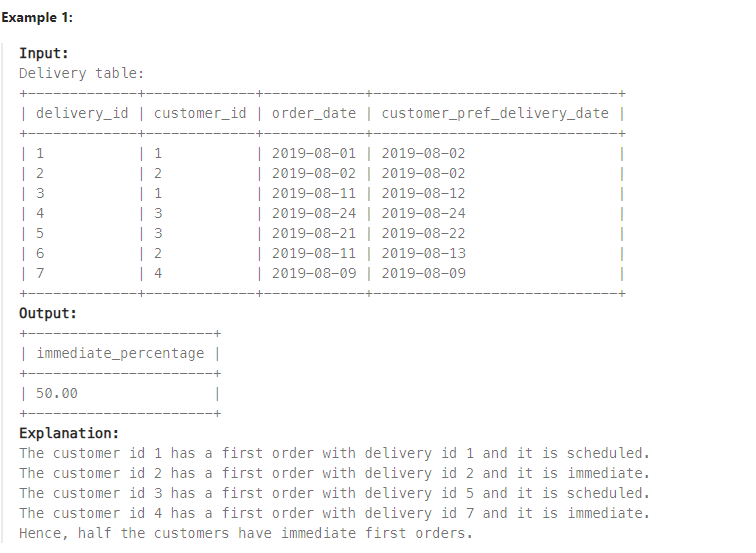


    with cte as
    (
        select *,
        Rank() OVER(partition by customer_id Order by order_date) as serial,
        CASE WHEN order_date = customer_pref_delivery_date then 'immediate'
        else 'scheduled' end as order_type
        from Delivery
    )

    select
    (
        round((select count(*) from cte
        where serial = 1 and order_type = 'immediate')
        /
        (select count(*) from cte
        where serial = 1)
        * 100,2)
    ) as immediate_percentage